In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import shapiro, kstest, jarque_bera, pointbiserialr
import warnings
import problem
pd.set_option('display.max_columns', None)


from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectFromModel


In [2]:
X_train_big, y_train_big = problem.get_train_data()
X_test_big, y_test_big = problem.get_test_data()

In [3]:
# Sélection des 284 premères colonnes de cet array
X_train_big = X_train_big[:,:284]
X_test_big = X_test_big[:,:284]
le = LabelEncoder()
y_train_big = le.fit_transform(y_train_big)
y_test_big = le.transform(y_test_big)

In [4]:
X_train_big_df = pd.DataFrame(X_train_big)
X_train_big_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283
0,0.063950,0.058779,0.062019,0.063885,0.459166,0.495607,0.983571,1.016309,0.472519,0.458482,3.699328,3.891052,43.727148,46.839295,1.861738,1.600940,6.949067,6.602521,0.197389,0.088899,3.509545,3.868213,0.0,0.006691,1.030629,0.886491,0.432629,0.519747,5.121380,5.197561,5.970099,6.115869,1.021699,0.948522,0.0,0.018380,1.926472,1.688208,0.866072,0.765716,1.129525,0.952076,0.748766,0.804965,5.678812,3.593008,4.136072,4.082153,1.972651,2.029637,10.694996,12.085149,4.084245,4.069608,4.124024,4.195330,4.856091,5.988602,2.038884,2.212194,1.824283,1.860046,3.116033,4.314770,7.879623,9.186142,1.643896,2.396960,6.913992,6.458951,11.177783,12.297685,9.443381,10.570943,2.118859,2.355222,4.243192,5.328422,1.909367,1.870001,23.527894,21.563322,7.007424,4.798710,4.365712,4.287334,1.105905,1.418969,3.106513,2.763244,7.012673,9.659502,15.942507,16.126517,4.306232,3.673256,3.900862,4.369354,3.426686,3.412810,1.309041,1.645788,6.195075,5.362170,14.531433,14.472056,3.171207,3.468168,2.097551,2.337278,2.574405,1.855471,10.828816,11.508742,2.692153,2.845805,2.240396,1.812194,13.773665,13.375478,2.715496,2.112074,1.213353,1.056269,13.941241,16.353896,7.155919,5.776451,9.491505,8.571933,3.359540,4.538873,10.503992,11.246724,6.119579,7.442181,7.917531,7.600340,3.520569,3.490825,1.593643,1.186705,0.702130,0.478692,0.795821,0.914465,0.000651,0.004475,0.108038,0.127435,3.399683,4.479527,0.115125,0.240903,14.623450,14.633947,0.620376,0.476496,2.374654,2.993409,1.003029,1.116563,0.491212,0.590823,0.0,0.015879,7.060726,6.794855,0.000019,0.000000,0.005074,0.002576,0.670018,0.547108,1.205397,1.001903,0.0,0.096709,1.266151,0.985272,0.225146,0.233718,0.312669,0.149594,0.361265,0.373862,2.020016,1.711067,1.683313,1.462564,0.989176,0.856720,5.048548,5.036340,1.387429,1.190170,1.610258,1.580503,2.541291,2.183337,1.848933,1.593329,0.790189,0.526943,3.055189,3.608012,1.923263,1.565756,1.175147,1.129571,2.673995,2.439181,3.540522,3.648489,2.541153,2.519138,1.348092,1.144487,2.162146,1.444949,0.616175,0.659386,13.519244,10.250265,3.071711,2.055146,2.528465,2.340123,1.249222,1.072281,2.092310,1.579149,5.421099,5.097678,4.291048,4.244212,2.903154,2.572539,0.930181,0.876963,2.056257,1.799842,0.675337,0.763226,2.559383,1.737307,5.960146,5.138183,1.943786,1.881758,0.835442,0.715817,1.057105,0.537774,10.036834,9.378927,1.700446,1.657481,0.787840,0.711400,9.496898,8.206657,0.865811,0.485260,1.045714,0.813702,11.338419,12.499593,3.802006,3.425950,4.666527,4.315518,2.159723,2.515004,7.488130,8.622047,2.465118,2.656249,6.584050,6.213031,1.787291,2.043806,0.406808,0.403986
1,0.047534,0.044989,0.053391,0.068330,0.450894,0.434376,1.011141,0.993529,0.226344,0.301962,2.966062,3.130381,42.040282,42.814709,1.791841,1.574800,5.030105,5.226873,0.172925,0.137102,3.138643,3.756924,0.0,0.006904,0.381828,0.330303,0.267901,0.312716,3.820349,3.614776,3.911261,3.971381,0.726819,0.673300,0.0,0.015770,1.663731,1.649721,0.838229,0.796972,1.276345,1.138031,0.704606,0.751557,5.964495,4.849005

In [5]:
def categorize_variables(X_train):
    binary_vars = []
    discrete_vars = []
    continuous_vars = []

    for col in range(X_train.shape[1]):
        unique_values = np.unique(X_train[:, col])
        num_unique_values = len(unique_values)

        if num_unique_values == 2:
            binary_vars.append(col)
        elif num_unique_values < 20:
            if num_unique_values > 2:
                discrete_vars.append(col)
        else:
            continuous_vars.append(col)

    return binary_vars, discrete_vars, continuous_vars

binary_vars, discrete_vars, continuous_vars = categorize_variables(X_train_big)

print("Binary variables:", binary_vars)
print("Discrete variables:", discrete_vars)
print("Continuous variables:", continuous_vars)

Binary variables: []
Discrete variables: []
Continuous variables: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 2

In [6]:
def test_normality(data, column_name):
    try:
        normalized_data = (data - data.mean()) / data.std()
        
        # Effectuer les tests
        _, p_shapiro = shapiro(data)
        _, p_ks = kstest(normalized_data, 'norm')
        _, p_jb = jarque_bera(data)
        
        return {
            "Variable": column_name,
            "Shapiro": p_shapiro > 0.05,
            "Kolmogorov-Smirnov": p_ks > 0.05,
            "Jarque-Bera": p_jb > 0.05
        }
    except Exception as e:
        warnings.warn(f"Error testing {column_name}: {str(e)}")
        return None
    
results = []
X_train = pd.DataFrame(X_train_big)
X_train_continuous = X_train.iloc[:, continuous_vars]

# Parcourir les colonnes et effectuer les tests
for col in X_train_continuous.columns:
    result = test_normality(X_train_continuous[col], col)
    if result:
        results.append(result)

# Création du DataFrame
results_df = pd.DataFrame(results)

test_summaries = {
    "Shapiro": results_df["Shapiro"].sum(),
    "Kolmogorov-Smirnov": results_df["Kolmogorov-Smirnov"].sum(),
    "Jarque-Bera": results_df["Jarque-Bera"].sum()
}

print("Nombre de variables classées normales selon chaque test :")
print("-" * 50)
for test_name, count in test_summaries.items():
    print(f"{test_name:<20}: {count:>3} variables normales sur {len(results_df)} variables totales")
print("-" * 50)

results_df["Nombre_de_tests_positifs"] = results_df[["Shapiro", "Kolmogorov-Smirnov", "Jarque-Bera"]].sum(axis=1)

final_df = results_df[["Variable", "Nombre_de_tests_positifs"]].sort_values(
    by="Nombre_de_tests_positifs", 
    ascending=False
)

continuous_normal = results_df[results_df["Nombre_de_tests_positifs"] == 3]["Variable"].tolist()

print("\nClassement des variables selon le nombre de tests positifs :")
final_df.head(50)

Nombre de variables classées normales selon chaque test :
--------------------------------------------------
Shapiro             :  45 variables normales sur 280 variables totales
Kolmogorov-Smirnov  : 191 variables normales sur 280 variables totales
Jarque-Bera         :  60 variables normales sur 280 variables totales
--------------------------------------------------

Classement des variables selon le nombre de tests positifs :


,Variable,Nombre_de_tests_positifs
49,51,3
66,68,3
91,93,3
46,48,3
69,71,3
27,28,3
28,29,3
135,137,3
68,70,3
102,104,3


In [7]:
X_train_continuous_normal = X_train_continuous[continuous_normal]

X_train_continuous_not_normal = X_train_continuous.drop(columns=continuous_normal)
X_discrete = X_train.iloc[:, discrete_vars]
y_train = pd.DataFrame(y_train_big)

<Axes: >

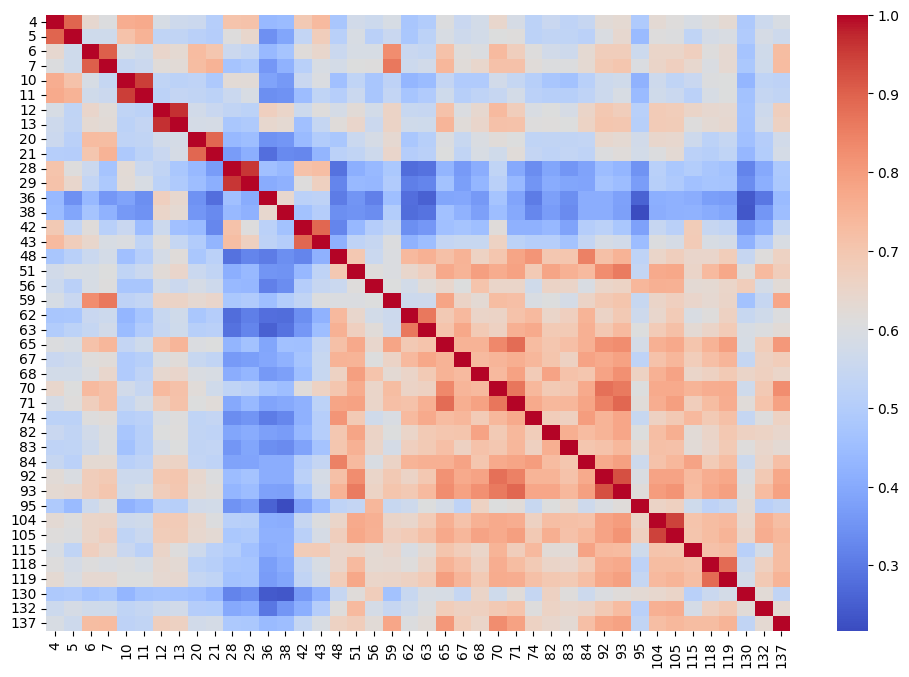

In [8]:
correlation = X_train_continuous_normal.corr(method='pearson')
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=False, fmt=".2f", cmap='coolwarm')

In [9]:
corr_df = pd.DataFrame(correlation, columns=X_train_continuous_normal.columns, index=X_train_continuous_normal.columns)

threshold = 0.9
high_correlation_pairs = []

# Parcourir la matrice de corrélation et ajouter les paires trop corrélées à la liste
for i in range(len(corr_df.columns)):
    for j in range(i):
        if abs(corr_df.iloc[i, j]) > threshold:
            high_correlation_pairs.append((corr_df.columns[i], corr_df.columns[j], corr_df.iloc[i, j]))

# Affichage des paires trop corrélées
if high_correlation_pairs:
    print("Paires trop corrélées :")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")
else:
    print("Aucune paire trop corrélée trouvée.")

Paires trop corrélées :
7 - 6: 0.90
11 - 10: 0.95
13 - 12: 0.96
29 - 28: 0.96
93 - 92: 0.92
105 - 104: 0.94


In [10]:
from scipy.stats import pointbiserialr

# Calcul des corrélations point-bisériales avec la cible
y_train_array = y_train.values.ravel()  # Convertir en tableau 1D
pointbiserial_corr = {}

for col in X_train_continuous_normal.columns:
    corr, _ = pointbiserialr(X_train_continuous_normal[col], y_train_array)
    pointbiserial_corr[col] = abs(corr)  # Prendre la valeur absolue pour comparaison

# Convertir en DataFrame pour faciliter l'analyse
pb_corr_df = pd.DataFrame.from_dict(pointbiserial_corr, orient='index', columns=['PointBiserialCorr'])

# Supprimer les variables dans les paires trop corrélées
to_drop = set()

for var1, var2, _ in high_correlation_pairs:
    corr_var1 = pointbiserial_corr[var1]
    corr_var2 = pointbiserial_corr[var2]
    
    # Ajouter la variable à faible corrélation avec la cible à la liste des variables à supprimer
    if corr_var1 < corr_var2:
        to_drop.add(var1)
    else:
        to_drop.add(var2)

# Mise à jour du DataFrame en supprimant les variables sélectionnées
X_train_continuous_normal_filtered = X_train_continuous_normal.drop(columns=to_drop)

print(f"Variables supprimées en raison de corrélations élevées : {to_drop}")
print(f"Nombre de variables restantes : {X_train_continuous_normal_filtered.shape[1]}")

Variables supprimées en raison de corrélations élevées : {6, 105, 10, 13, 28, 93}
Nombre de variables restantes : 36


<Axes: >

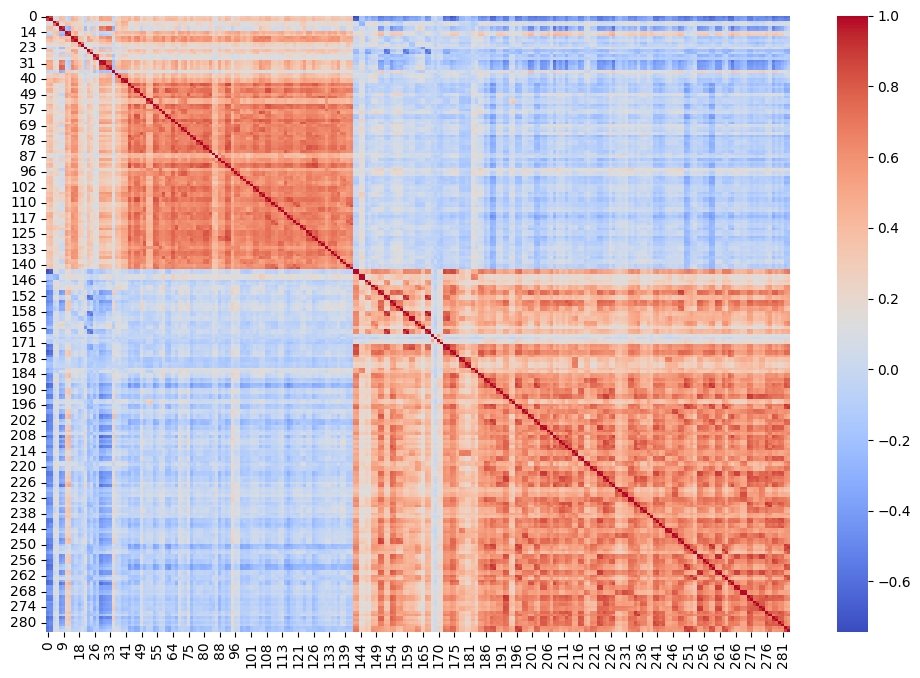

In [11]:
correlation = X_train_continuous_not_normal.corr(method='spearman')
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=False, fmt=".2f", cmap='coolwarm')

In [12]:
corr_df = pd.DataFrame(correlation, columns=X_train_continuous_not_normal.columns, index=X_train_continuous_not_normal.columns)

threshold = 0.9
high_correlation_pairs = []

# Parcourir la matrice de corrélation et ajouter les paires trop corrélées à la liste
for i in range(len(corr_df.columns)):
    for j in range(i):
        if abs(corr_df.iloc[i, j]) > threshold:
            high_correlation_pairs.append((corr_df.columns[i], corr_df.columns[j], corr_df.iloc[i, j]))

# Affichage des paires trop corrélées
if high_correlation_pairs:
    print("Paires trop corrélées :")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")
else:
    print("Aucune paire trop corrélée trouvée.")

Paires trop corrélées :
9 - 8: 0.93
15 - 14: 0.93
17 - 16: 0.91
31 - 30: 0.97
33 - 32: 0.92
41 - 40: 0.95
47 - 46: 0.95
81 - 80: 0.93
103 - 102: 0.90
109 - 108: 0.92
125 - 124: 0.90
143 - 142: 0.99
145 - 144: 0.98
151 - 150: 0.94
153 - 152: 0.91
155 - 154: 0.91
158 - 152: 0.93
159 - 153: 0.94
161 - 160: 0.99
166 - 152: 0.95
166 - 158: 0.98
167 - 153: 0.94
167 - 159: 0.98
173 - 172: 0.96
175 - 174: 0.96
179 - 178: 0.96
181 - 180: 0.93
187 - 186: 0.93
189 - 188: 0.91
193 - 192: 0.92
199 - 198: 0.92
202 - 188: 0.91
205 - 204: 0.96
217 - 216: 0.91
219 - 218: 0.91
223 - 222: 0.96
224 - 192: 0.90
225 - 224: 0.90
231 - 230: 0.95
233 - 232: 0.98
245 - 244: 0.96
247 - 246: 0.96
250 - 196: 0.90
255 - 254: 0.94
258 - 188: 0.92
258 - 250: 0.94
259 - 189: 0.91
259 - 251: 0.92
260 - 222: 0.91
260 - 254: 0.95
260 - 255: 0.92
261 - 254: 0.93
261 - 255: 0.95
261 - 260: 0.94
262 - 252: 0.93
263 - 253: 0.91
267 - 266: 0.96
269 - 268: 0.98
270 - 192: 0.92
271 - 270: 0.92
274 - 254: 0.90
275 - 255: 0.90
27

In [13]:
y_train_array = y_train.values.ravel()  # Convertir en tableau 1D
pointbiserial_corr = {}

for col in X_train_continuous_not_normal.columns:
    corr, _ = pointbiserialr(X_train_continuous_not_normal[col], y_train_array)
    pointbiserial_corr[col] = abs(corr)  # Prendre la valeur absolue pour comparaison

# Convertir en DataFrame pour faciliter l'analyse
pb_corr_df = pd.DataFrame.from_dict(pointbiserial_corr, orient='index', columns=['PointBiserialCorr'])

# Supprimer les variables dans les paires trop corrélées
to_drop = set()

for var1, var2, _ in high_correlation_pairs:
    corr_var1 = pointbiserial_corr[var1]
    corr_var2 = pointbiserial_corr[var2]
    
    # Ajouter la variable à faible corrélation avec la cible à la liste des variables à supprimer
    if corr_var1 < corr_var2:
        to_drop.add(var1)
    else:
        to_drop.add(var2)

# Mise à jour du DataFrame en supprimant les variables sélectionnées
X_train_continuous_not_normal_filtered = X_train_continuous_not_normal.drop(columns=to_drop)

print(f"Variables supprimées en raison de corrélations élevées : {to_drop}")
print(f"Nombre de variables restantes : {X_train_continuous_not_normal_filtered.shape[1]}")

Variables supprimées en raison de corrélations élevées : {258, 259, 260, 261, 8, 267, 269, 270, 15, 143, 17, 144, 274, 275, 276, 150, 279, 152, 153, 282, 155, 283, 31, 32, 160, 166, 167, 41, 173, 47, 175, 178, 181, 187, 188, 192, 193, 196, 198, 202, 204, 81, 217, 219, 223, 225, 230, 103, 232, 235, 109, 244, 252, 247, 250, 251, 124, 253, 254, 255}
Nombre de variables restantes : 178


In [14]:
# Fusionner les DataFrames
X_merged = pd.concat([X_train_continuous_normal_filtered, X_train_continuous_not_normal_filtered, X_discrete], axis=1)

# Mise à l'échelle des données
# scaler = StandardScaler()
# X_merged_scaled = pd.DataFrame(scaler.fit_transform(X_merged), columns=X_merged.columns)

# Régression logistique avec pénalité L1
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=1)
log_reg.fit(X_merged, y_train)

# Sélectionner les caractéristiques importantes
selector = SelectFromModel(log_reg, prefit=True)
X_selected = selector.transform(X_merged)

# Afficher les caractéristiques sélectionnées
selected_features = X_merged.columns[selector.get_support()]  # Utilisez X_merged.columns ici
print("Caractéristiques sélectionnées :")
print(selected_features)

# Afficher la nouvelle forme de X après la sélection de caractéristiques
print("Nouvelle forme de X :", X_selected.shape)

/Users/issameabdeljalil/Desktop/M2_MOSEF/ML_Duchesnay/brain_anatomy_schizophrenia_IMSD-GRA-MOSEF_2024/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Caractéristiques sélectionnées :
Index([ 12,  20,  29,  51,  62,  63,  68,  70,  71,  83,  84,  92,  95, 104,
       119, 130, 137,   9,  16,  27,  37,  45,  46,  49,  50,  54,  55,  57,
        58,  60,  64,  69,  73,  75,  80,  90,  91,  94,  96,  98, 101, 107,
       112, 113, 125, 126, 127, 128, 129, 131, 133, 135, 136, 139, 145, 154,
       158, 189, 195, 197, 199, 200, 205, 210, 211, 212, 215, 222, 228, 231,
       233, 236, 239, 240, 241, 242, 249, 257, 266, 271, 273, 281],
      dtype='int64')
Nouvelle forme de X : (410, 82)


In [15]:
# # Calcul des odds ratios
# coefficients = log_reg.coef_[0]
# odds_ratios = np.exp(coefficients)

# # Définir les seuils
# lower_threshold = 0.5
# upper_threshold = 1.5

# # Sélectionner les colonnes dont les odds ratios sont compris entre les seuils et différents de 1
# selected_columns = X_merged.columns[(odds_ratios > lower_threshold) & (odds_ratios < upper_threshold) & (odds_ratios != 1)]

# # Afficher les caractéristiques sélectionnées
# print("Caractéristiques sélectionnées :")
# print(selected_columns)

# # Filtrer les colonnes sélectionnées
# X_selected = X_merged_scaled[selected_columns]

# # Afficher la nouvelle forme de X après la sélection de caractéristiques
# print("Nouvelle forme de X :", X_selected.shape)

In [16]:
X_train_import = pd.read_csv("data/train_rois.csv")
columns_to_drop = ['participant_id', 'session', 'run', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']
X_train_import.drop(columns=columns_to_drop, inplace=True)

In [17]:
column_names = X_train_import.columns
selected_features_names = column_names[selected_features]

In [18]:
X_train_selected = pd.DataFrame(X_selected)
X_train_selected.columns = selected_features_names
X_test_big = pd.DataFrame(X_test_big)
y_test = pd.DataFrame(y_test_big)
X_test_selected = X_test_big[selected_features]
X_train_selected.shape

(410, 82)

In [19]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, balanced_accuracy_score

# Mise à l'échelle des données
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Initialisation du StackingClassifier
stack = StackingClassifier(
    estimators=[
        ('svc', SVC(random_state=1, probability=True)),
        ('gb', GradientBoostingClassifier(random_state=1)),
        ('mlp', MLPClassifier(random_state=1))
    ],
    final_estimator=LogisticRegression(random_state=1),
    stack_method='predict_proba',
)

stack.fit(X_train_selected_scaled, y_train)

y_pred_proba = stack.predict_proba(X_test_selected_scaled)[:, 1]
y_pred = stack.predict(X_test_selected_scaled)

roc_auc = round(roc_auc_score(y_test, y_pred_proba),2)
bacc = round(balanced_accuracy_score(y_test, y_pred),2)

print("ROC AUC Score:", roc_auc)
print("Balanced Accuracy Score:", bacc)

/Users/issameabdeljalil/Desktop/M2_MOSEF/ML_Duchesnay/brain_anatomy_schizophrenia_IMSD-GRA-MOSEF_2024/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/issameabdeljalil/Desktop/M2_MOSEF/ML_Duchesnay/brain_anatomy_schizophrenia_IMSD-GRA-MOSEF_2024/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/issameabdeljalil/Desktop/M2_MOSEF/ML_Duchesnay/brain_anatomy_schizophrenia_IMSD-GRA-MOSEF_2024/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

ROC AUC Score: 0.86
Balanced Accuracy Score: 0.78


/Users/issameabdeljalil/Desktop/M2_MOSEF/ML_Duchesnay/brain_anatomy_schizophrenia_IMSD-GRA-MOSEF_2024/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Initialisation de LIME
explainer = LimeTabularExplainer(
    X_train_selected_scaled,
    training_labels=y_train,
    mode='classification',
    feature_names=X_train_selected.columns,  # Remplacez par une liste des noms de vos features
    class_names=['Classe 0', 'Classe 1'],  # Noms des classes
    discretize_continuous=True,
)

# Explication d'une prédiction spécifique
instance_index = 0  # Modifier pour analyser une autre instance
instance = X_test_selected_scaled[instance_index]

# Génération de l'explication
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=stack.predict_proba,
)

# Affichage des explications locales
exp.show_in_notebook(show_all=False)  # Pour Jupyter Notebook
exp.save_to_file('lime_explanation.html')  # Enregistrement dans un fichier HTML


  0%|          | 0/103 [00:00<?, ?it/s]

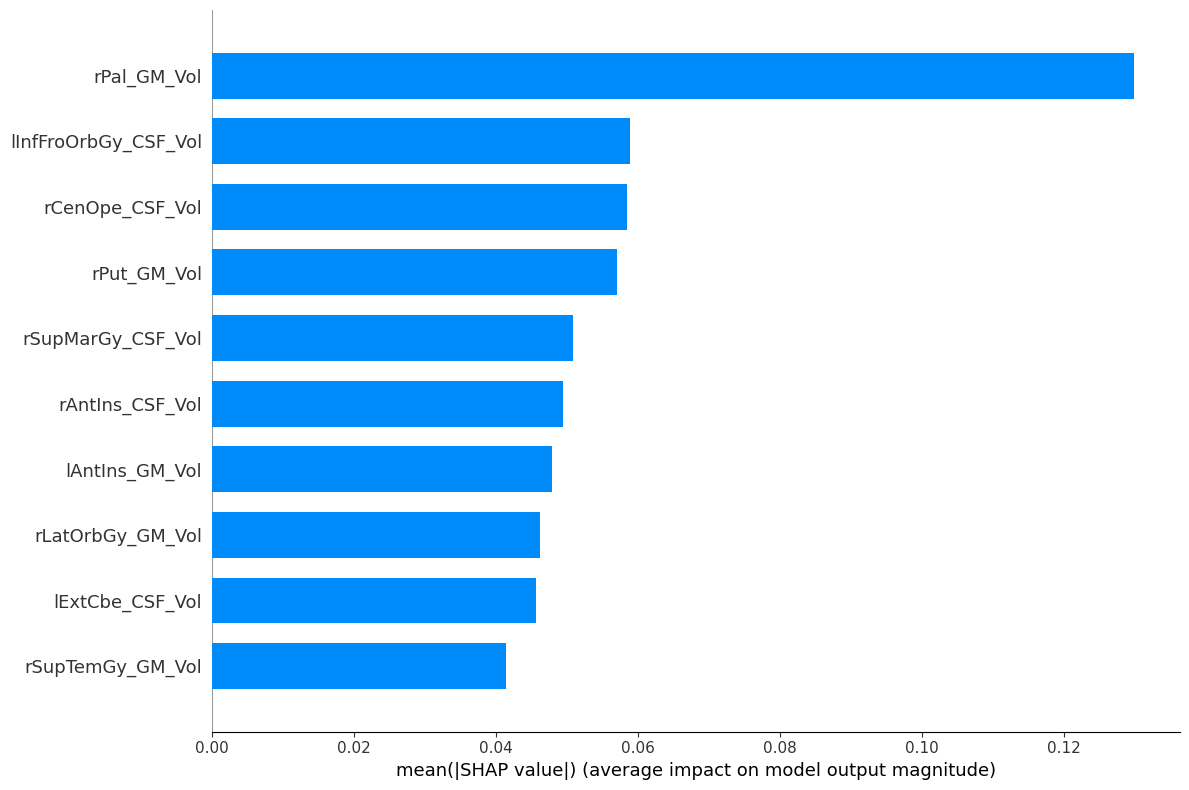

In [31]:
import shap
import matplotlib.pyplot as plt

# Création d'un échantillon de background data plus petit (100 échantillons)
background_data = shap.kmeans(X_train_selected_scaled, k=100)

# Calcul des valeurs SHAP avec l'échantillon réduit
explainer = shap.KernelExplainer(stack.predict, background_data)
shap_values = explainer.shap_values(X_test_selected_scaled)

# Si votre modèle retourne une seule classe
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Configuration du style de matplotlib
plt.style.use('default')
plt.figure(figsize=(12, 8))

# Création du summary plot pour les 10 variables les plus importantes
shap.summary_plot(
    shap_values,
    X_test_selected_scaled,
    feature_names=X_train_selected.columns,
    plot_type="bar",
    plot_size=(12, 8),
    color_bar=True,
    max_display=10  # Nombre de variables à afficher limité à 10
)

# Ajout d'un titre
plt.title("Top 10 des variables les plus importantes (valeurs SHAP)", pad=20)

# Ajustement de la mise en page
plt.tight_layout()

# Sauvegarde du graphique
plt.savefig('shap_importance_top10.png', dpi=300, bbox_inches='tight')
plt.close()
